In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### MNIST dataset

In [15]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [16]:
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
m, n = train_data.shape
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0
X_test = X_test.T                   # X_test shape: (784, 10000)
X_train = X_train.T                 # X_train shape: (784, 60000)

# one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
# one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

In [17]:
# Function to initialize the parameters with random values
def init_params():
    w1=np.random.rand(20,784)-0.5   # w1 shape: (20, 784)
    b1=np.random.rand(20,1)-0.5     # b1 shape: (20, 1)
    w2=np.random.rand(10,20)-0.5    # w2 shape: (10, 20)
    b2=np.random.rand(10,1)-0.5     # b2 shape: (10, 1)
    w3=np.random.rand(10,10)-0.5    # w3 shape: (10, 10)
    b3=np.random.rand(10,1)-0.5     # b3 shape: (10, 1)
    return w1, b1, w2, b2

In [18]:
# Activation functions and their derivatives
def sigmoid(z):
    # z = np.clip(z, -500, 500)
    return 1/(1+np.exp(-z))

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z_new = Z - np.max(Z, axis=0, keepdims=True)
    A = np.exp(Z_new) / np.sum(np.exp(Z_new), axis=0, keepdims=True)
    return A

def deriv_ReLU(Z):
    return Z>0

def deriv_sigmoid(Z):
    # print(Z.min(), Z.max())
    return Z*(1-Z)

# Loss function
def cross_entropy_loss(Y, Y_hat):
    return -np.mean(Y*np.log(Y_hat))

In [19]:
# Forward Propagation
def forward_prop(w1, b1, w2, b2, X):
    z1=w1.dot(X)+b1     # w1 shape: (20, 784),  b1.shape: (20, 1), z1 shape: (20, 60000)
    a1=sigmoid(z1)      # a1 shape: (20, 60000)
    z2=w2.dot(a1)+b2    # w2 shape: (10, 20),   b2.shape: (10, 1), z2 shape: (10, 60000)
    a2=softmax(z2)      # a2 shape: (10, 60000)
    return z1, a1, z2, a2

In [20]:
# Backward Propagation
def back_prop(z1, a1, z2, a2, w2, Y, X, loss="ce"):
    OneHot_Y=one_hot(Y).T
    if loss == "ce":
        dZ2=(a2-OneHot_Y) / m
    elif loss == "tss":
        dZ2=(a2-OneHot_Y)*a2*(1-a2) / m
    dW2=dZ2.dot(a1.T)
    db2=np.sum(dZ2, axis=1, keepdims=True)
    dZ1=w2.T.dot(dZ2)*deriv_sigmoid(a1)
    dW1=dZ1.dot(X.T)
    db1=np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [21]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1, b1, W2, b2

In [22]:
# Functions to get predictions and accuracy
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

In [23]:
# Training the model
def train(X, Y, iterations, alpha):
    w1, b1, w2, b2=init_params()
    print(X.shape)
    for i in range(iterations):
        z1, a1, z2, a2 =forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X, "ce")
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i%10==0:
            print("Iterations: ",i, end=", ")
            print("Accuracy: ",get_accuracy(get_predictions(a2),Y), end = ", ")
            print("Loss: ",cross_entropy_loss(one_hot(Y).T, a2))
    return w1, b1, w2, b2

In [24]:
w1, b1, w2, b2 = train(X_train, y_train, 600, 0.6)

(784, 60000)
Iterations:  0, Accuracy:  0.12026666666666666, Loss:  0.2366597908923039
Iterations:  10, Accuracy:  0.395, Loss:  0.19688727090123537
Iterations:  20, Accuracy:  0.5529166666666666, Loss:  0.16986655446641166
Iterations:  30, Accuracy:  0.6329666666666667, Loss:  0.14720035644441348
Iterations:  40, Accuracy:  0.6842166666666667, Loss:  0.12870390117422997
Iterations:  50, Accuracy:  0.7208833333333333, Loss:  0.11389776719375558
Iterations:  60, Accuracy:  0.7485, Loss:  0.10219399367667667
Iterations:  70, Accuracy:  0.7702, Loss:  0.09294701507214718
Iterations:  80, Accuracy:  0.7869, Loss:  0.08556442980676773
Iterations:  90, Accuracy:  0.7998, Loss:  0.07957407511918861
Iterations:  100, Accuracy:  0.8099833333333334, Loss:  0.07462713481295953
Iterations:  110, Accuracy:  0.8197166666666666, Loss:  0.07047364872419877
Iterations:  120, Accuracy:  0.8280166666666666, Loss:  0.06693518443024093
Iterations:  130, Accuracy:  0.8346, Loss:  0.06388301934666252
Iterati

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


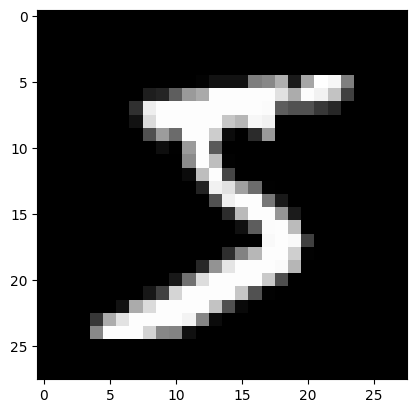

In [26]:
test_prediction(0, w1, b1, w2, b2)

In [27]:
test_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(test_predictions, y_test)

0.9128